## Protien Sequence Analysis of COVID-19 Genome

### Introduction

Viral proteins are proteins generated by a virus. As viruses hijack much of their host's cellular machinery to support their life cycle, they encode very few of their own genes; viral proteins are therefore generally structural components, for the viral envelope and capsid.

The global coronavirus disease 2019 (COVID-19) pandemic caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has incurred over 265 million confirmed cases and more than 5.25 million fatalities since December of 2019
Severe acute respiratory syndrome coronaviruses (SARS-CoVs) and Middle East respiratory syndrome coronaviruses (MERS-CoVs) of this family have emerged before and SARS-CoV-2 has emerged globally. The characterization of spike glycoproteins, polyproteins and other viral proteins from viruses is important for antiviral drug development.

For my final project, I will try to identify those viral proteins in COVID-19 genome and compare the already emerged variants. I will be utilizing the National Center for Biotechnology Information’s (NCBI) Genbank database to obtain the sequential data and RCSB’s Protein Data Bank (PDB) for 3D visualization to perform a bioinformatic analysis, sequence alignment comparison of multiple sequences and modeling of MERS and SARS whole-genome sequencing.


In [ ]:
#installing the neccessary library which will assist in uncovering the biological sequence data
!pip install biopython 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Genome sequencing has increasingly become an important tool for studying disease outbreaks. The __NC_045512.2_sequence.fasta__ file used below is obtained from National Center for Biotechnology Information (NCBI) Genbank.

* Website: https://www.ncbi.nlm.nih.gov/genbank/

The sequence file was submitted on January 05, 2020 by Shanghai Public Health Clinical Center & School of Public Health, Fudan University, Shanghai, China. The __NC_045512.2_sequence.fasta__ file could be easily obtained from:

*Resource: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta

I will also be using __Bio.SeqIO__, which is the standard input and output interface for BioPython. Although it is limited to only deal with sequences as SeqRecord objects, It provides a simple interface to input and output assorted sequence files.

In [ ]:
#importing Bio.SeqIO from Biopython for parsing DNA sequence data
from Bio import SeqIO

#reading NC_045512.2_sequence.fasta file as fasta
#NC_045512.2_sequence.fasta contains the complete genome

for record in SeqIO.parse("NC_045512.2_sequence.fasta", "fasta"):
  print(record)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [ ]:
#SeqIO.read() will produce will that basic information regarding the sequence
#it provides the id, name, description and sequence

ncovid_record = SeqIO.read("NC_045512.2_sequence.fasta", "fasta")
ncovid_record

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [ ]:
#the DNA Sequence for the sequence file and 
#length of the sequence

for sequence in SeqIO.parse("NC_045512.2_sequence.fasta", "fasta"):
  print(sequence.seq)
  print("Nucliotides:", len(sequence))

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [ ]:
#since the input sequence is FASTA(DNA) and COVID19 is RNA Type Virus, we need to
#transcribe the DNA sequence to RNA and 
#translate the RNA to an Amino Acid sequence 


#Protein synthesis
#DNA ==> Mrna ==> Protein or Aminoacid


#the dna sequence 
ncovid_dna = ncovid_record.seq
print("DNA Sequence:",ncovid_dna[:100])
print("Size:",len(ncovid_dna))
print("\n")

#Transcription from DNA to mRNA
ncovid_mrna = ncovid_dna.transcribe()
print("mRNA Sequence:",ncovid_mrna[:100])
print("Size:",len(ncovid_mrna))
print("\n")

#Translation to Amino Acid
ncovid_protein = ncovid_mrna.translate()
print("Protein Sequence:", ncovid_protein[:100])
print("Size:",len(ncovid_protein))
print("\n")

DNA Sequence: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
Size: 29903


mRNA Sequence: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC
Size: 29903


Protein Sequence: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQREN
Size: 9967




/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#counting the nucleotide frequency in the DNA
dna_nucleotides = {}

#for loop to count nucleotides
for n in ncovid_dna:
  if n in dna_nucleotides:
    dna_nucleotides[n] += 1
  else:
    dna_nucleotides[n] = 1

print("The frequency of DNA Nucleotides")
print(dna_nucleotides)

The frequency of DNA Nucleotides
{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


In the above code, I am using __ncovid_dna.transcribe()__ to translate the DNA sequence stored in "ncovid_dna" to messenger RNA. As it could be observed in the output, it converts "T" Thymine base to "U" Uracil while the length of the sequence stays the same. The __ncovid_mrna.translate()__ further translates the mRNA sequence into sequences of Amino Acids/Protein with IKGLYLPR encoding for the first protein and each letter encoding for a single amino acid. The “*” is used to denote where the stop codon is located. 

In [ ]:
#Here is the standard codon table to translate a genetic code to into a sequence of amino acids
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

A codon table is used to translate a genetic code into a sequence of amino acids. The standard genetic code is traditionally represented as an RNA codon table, because when proteins are made in a cell by ribosomes, it is messenger RNA (mRNA) that directs protein synthesis. The mRNA sequence is determined by the sequence of genomic DNA. In this context, the standard genetic code above is referred to as translation.

In [ ]:
#we can now identify all chains of amino acids using the stop codon as a refrence 
#The split() function splits the sequence at any stop codon and keeps the amino acids chains separated
ncovid_aminoacid = ncovid_protein.split("*")

__ProtParam__ is is a tool which allows the computation of various physical and chemical parameters for a given protein sequence. The computed parameters include the molecular weight, theoretical pI (isoelectric point), amino acid composition, atomic composition, extinction coefficient, estimated half-life, instability index, aliphatic index and grand average of hydropathicity (GRAVY). <br>

Documentation for the library: https://web.expasy.org/protparam/protparam-doc.html



In [ ]:
#further analysis of the sequence using ProtParam 
from Bio.SeqUtils import ProtParam

protein_list = [] #list to hold the protein_sequence
weight_list = [] #list to hold the molecular weight of each protein
ph_list = []  #list to hold the Isoelectric Point for each protein
sec_str_fraction = [] #list to hold the secondary structure of each protein
flexibility_list = [] #list to hold the flexibility of protein

for records in ncovid_aminoacid[:]:
  if len(records) == 0:
    
    #Since there are empty lists of proteins 
    #this condition will remove those empty elements
    ncovid_aminoacid.remove(records)

    #list comprehension to save the complete list of amino_acids 
    ncovid_clean = [str(i) for i in ncovid_aminoacid]
  else:
    print("\n")
    analysis = ProtParam.ProteinAnalysis(str(records))

    #count_amino_acids() counts each the number of amino acids
    protein_of_interest = analysis.count_amino_acids()
    protein_list.append(protein_of_interest)

    #molecular_weight() calculates the molecular weight of polypeptides
    molecular_weight = analysis.molecular_weight()
    weight_list.append(molecular_weight)

    #isoelectric_point() calculates
    #the pH at which a particular molecule carries no net electrical charge
    isoelectric_point = analysis.isoelectric_point()
    ph_list.append (isoelectric_point)

    #secondary_structure_fraction()
    #Returns a list of the fraction of amino acids which tend to be in Helix, Turn or Sheet.
    secondary_structure_fraction = analysis.secondary_structure_fraction()
    sec_str_fraction.append(secondary_structure_fraction)

    #flexibility() calcualtes accuracy of protein flexibility
    #Reference: https://onlinelibrary.wiley.com/doi/10.1002/prot.340190207
    flexibility = analysis.flexibility()
    flexibility_list.append(flexibility)

    print("Name:", records)
    print("Protein of Interest:", protein_of_interest)
    print("Molecular Weight:", molecular_weight)
    print("Secondary Structure Fraction = ", secondary_structure_fraction)
    print("Flexibility = ", flexibility)
    print("Isoelectric point = ", isoelectric_point)

Streaming output truncated to the last 5000 lines.


Name: ACK
Protein of Interest: {'A': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 1, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}
Molecular Weight: 320.4084
Secondary Structure Fraction =  (0.0, 0.0, 0.3333333333333333)
Flexibility =  []
Isoelectric point =  8.266410255432131


Name: IFGFVC
Protein of Interest: {'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 2, 'G': 1, 'H': 0, 'I': 1, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 1, 'W': 0, 'Y': 0}
Molecular Weight: 684.8457
Secondary Structure Fraction =  (0.6666666666666666, 0.16666666666666666, 0.0)
Flexibility =  []
Isoelectric point =  5.518122673034666


Name: LYHYWWS
Protein of Interest: {'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 0, 'L': 1, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 1, 'T': 0, 'V': 0, 'W': 2, 'Y': 2}
Molecular Weight: 1054.1557
Secondary Structure Fr

In [ ]:
#now we have created a cleaner representation of the amino acids in ncoivd_clean
#all the sequence are separated before the stop codon

print("Origianl List", ncovid_aminoacid)
print("Separated ListL:", ncovid_clean)


Origianl List [Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG'), Seq('AGSRTRRHSVRS'), Seq('W'), Seq('DTWCPCPSCGRNTSGLPQGSSS'), Seq('ER'), Seq('RSWWP'), Seq('LRRRSKVI'), Seq('LRRRAWH'), Seq('SL'), Seq('RFSRKLEH'), Seq('T'), Seq('QWCYP'), Seq('THA'), Seq('A'), Seq('RRGIHSLCR'), Seq('QLLWP'), Seq('WLPS'), Seq('VH'), Seq('RPSSTCW'), Seq('SFMHFVRTTGLY'), Seq('H'), Seq('EGCILLP'), Seq('T'), Seq('A'), Seq('NCLVHGTF'), Seq('KEL'), Seq('IADTF'), Seq('N'), Seq('IGKEI'), Seq('HLQWGMSKFCISLKFHNQDYSTKG'), Seq('KEKA'), Seq('WLYG'), Seq('NSICLSSCVTK'), Seq('MQPNVPFNSHEV'), Seq('SLW'), Seq('NFMADGRFC'), Seq('SHLRILWH'), Seq('EFD'), Seq('RRCHYLWLLTPKCCC'), Seq('NLLSSMSQFRSRT'), Seq('A'), Seq('SCRIP'), Seq('IWLENHSS'), Seq('GWSHYCLWRLCVLLCWLP'), Seq('QVCLLGSTC'), Seq('R'), Seq('HRL'), Seq('PYRCCWRRFRRS

In [ ]:
#importing pandas 
import pandas as pd

#since I have curated lists regarding the properties of each amino acid
#it will be better visualized in a csv form
df = pd.DataFrame({"Amino Acid Sequence": ncovid_clean})
df["Molecular Weight"] = weight_list
df["Protein Count/Analysis"] = protein_list
df["Isoelectric Point"] = ph_list
df["Secondary Structure Function"] = sec_str_fraction
df["Flexibility"] = flexibility_list
df["Length"] = df['Amino Acid Sequence'].str.len()
df.head()

,Amino Acid Sequence,Molecular Weight,Protein Count/Analysis,Isoelectric Point,Secondary Structure Function,Flexibility,Length
0,IKGLYLPR,959.1858,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': ...",9.994292,"(0.5, 0.25, 0.25)",[],8
1,QTNQLSISCRSVL,1448.6445,"{'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': ...",8.249713,"(0.3076923076923077, 0.3076923076923077, 0.153...","[1.0195, 0.9710238095238095, 1.012297619047619...",13
2,TNFKICVAVTRLHA,1572.8727,"{'A': 2, 'C': 1, 'D': 0, 'E': 0, 'F': 1, 'G': ...",9.499110,"(0.3571428571428571, 0.07142857142857142, 0.21...","[0.9642380952380952, 0.9644285714285714, 0.967...",14
3,CTHAV,529.6103,"{'A': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': ...",6.731919,"(0.2, 0.0, 0.2)",[],5
4,LITNYCR,882.0388,"{'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': ...",8.221992,"(0.42857142857142855, 0.14285714285714285, 0.1...",[],7


In [ ]:
#saving the dataframe as an output file
df.to_csv('COVID19_Protein_Sequence_Analysis.csv')

#printing the 10 largest amino acid sequences
top_ten = df.nlargest(10,"Length").head()
top_ten.head()

,Amino Acid Sequence,Molecular Weight,Protein Count/Analysis,Isoelectric Point,Secondary Structure Function,Flexibility,Length
494,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,305149.8101,"{'A': 179, 'C': 89, 'D': 178, 'E': 101, 'F': 1...",6.899026,"(0.33543132173269163, 0.21177341725286933, 0.2...","[1.0018452380952383, 0.9605952380952383, 0.960...",2701
630,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,32785.3991,"{'A': 15, 'C': 7, 'D': 13, 'E': 12, 'F': 14, '...",5.672782,"(0.40344827586206894, 0.20344827586206898, 0.2...","[1.020952380952381, 1.007238095238095, 0.97703...",290
653,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,13959.2201,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':...",8.222894,"(0.3739837398373984, 0.1626016260162602, 0.268...","[0.9708095238095238, 0.9603928571428572, 0.944...",123
631,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,9284.8726,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ...",5.056363,"(0.49397590361445787, 0.1927710843373494, 0.31...","[0.9899166666666668, 1.040404761904762, 0.9732...",83
652,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,7528.7150,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ...",4.677701,"(0.42857142857142855, 0.14285714285714285, 0.2...","[0.9569404761904763, 0.9588571428571429, 0.987...",63


In [ ]:
#printing the elements of "protein_list" as reference
for i in protein_list[:10]:
  print(i)

{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 1, 'H': 0, 'I': 1, 'K': 1, 'L': 2, 'M': 0, 'N': 0, 'P': 1, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 1}
{'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 2, 'M': 0, 'N': 1, 'P': 0, 'Q': 2, 'R': 1, 'S': 3, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
{'A': 2, 'C': 1, 'D': 0, 'E': 0, 'F': 1, 'G': 0, 'H': 1, 'I': 1, 'K': 1, 'L': 1, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 2, 'V': 2, 'W': 0, 'Y': 0}
{'A': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 1, 'V': 1, 'W': 0, 'Y': 0}
{'A': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 1, 'K': 0, 'L': 1, 'M': 0, 'N': 1, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 1, 'V': 0, 'W': 0, 'Y': 1}
{'A': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 2, 'G': 1, 'H': 0, 'I': 3, 'K': 0, 'L': 3, 'M': 0, 'N': 1, 'P': 2, 'Q': 2, 'R': 4, 'S': 7, 'T': 4, 'V': 3, 'W': 0, 'Y': 0}
{'A': 2, 'C': 2, 'D': 1, 'E': 2, '

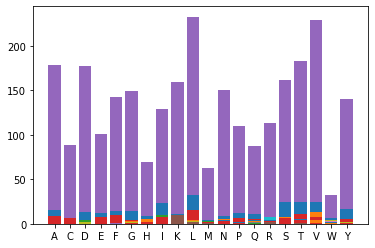

In [ ]:
#importing matplotlib to draw a figure of the frequency of amino acids 
import matplotlib.pyplot as plt

#loop iterating through the list of dictionaries holding the frequency of amino_acids in each protein
#plotting a bar graph to visualize the rate of occurrence
for i in protein_list:
    names = list(i.keys())
    values = list(i.values())
    plt.bar(range(len(i)), values, tick_label = names)
    plt.show


From the bar graph we can observe that the number of __Lysines(L) and Valines(V)__ are high in the protein sequence, which indicates a good number of Alpha_Helices.<br>
 
Lysines is an α-amino acid that is a precursor to many proteins. It contains an α-amino group, an α-carboxylic acid group classifying it as a basic, charged (at physiological pH), aliphatic amino acid. Valines is an α-amino acid that is used in the biosynthesis of proteins. It contains an α-amino group, an α-carboxylic acid group  and a side chain isopropyl group, making it a non-polar aliphatic amino acid. 
 
__Alpha Helix__<br>
The telephone cord shape of the helix is held in place by Hydrogen bonds between every N-H group and the oxygen of a C=O group in the next turn of the helix four amino acids down the chain. The typical helix is about 11 amino-acids long. 




### Additional Visualization 
 
Now I will create an instance of Biopython’s PDBParser, and use the nglview library to create our interactive visualization. We can pan, zoom, and rotate the molecule and even hover for specific atom information.<br>

The Protein Data Bank (PDB) archive-information about the 3D shapes of proteins, nucleic acids, and complex assemblies that helps students and researchers understand all aspects of biomedicine and agriculture, from protein synthesis to health and disease. It builds upon the data by creating tools and resources for research in molecular biology, structural biology, computational biology and beyond. <br>

* More Info: https://www.wwpdb.org/ <br>

To 3D visualize our structure we will be using the file name __6lu7.pdb__,
* Resource: https://ncbi.nlm.nih.gov/Structure/pdb/6LU7<br>

6LU7 is the crystal structure of COVID-19 main protease in complex with an inhibitor N3.


In [ ]:
from Bio.PDB import PDBParser

#reading the pdb file
parser = PDBParser()
structure = parser.get_structure("6lu7", "6lu7.pdb")

#length of the structure
print("Length of the structure =", len(structure))
print("\n")


Length of the structure = 1




/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  PDBConstructionWarning,


In [ ]:
#from the output we can see that we only have one chain 
#Hence structure[0] will be our model

model = structure[0]
for chain in model:
  print(chain)

<Chain id=A>
<Chain id=C>


In [ ]:
#installing nglview to visualize the structure of the chain
#NGLview is a Jupyter/IPython widget used to interactively view molecular structures
#as well as trajectories from molecular dynamics simulations
!pip install nglview

In [ ]:
'''
Since I am using Google Collab as a working enviroment
support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. 
Support for these widgets will be loaded from a CDN external from Colab
'''
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import nglview as nv

#creating an interactive 3D Model
view = nv.show_biopython(structure)
view

NGLWidget()

In [ ]:
#rendering the pdb file as an image
view.render_image()

Image(value=b'', width='99%')

In [ ]:
#installing for further visualization
pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


__Py3DMol__ is a python package for dependency-free molecular visualization in iPython notebooks. Objects from MDAnalysis, MDTraj, OpenBabel, and CClib can be visualized and manipulated directly in a notebook notebook. The backend visualization library, 3DMol.js, is included, so no additional libraries are necessary - visualizations will function in any modern browser using javascript and WebGL.

In [ ]:
import py3Dmol

#creating a molecular view of the genome from the pdb file
view2 = py3Dmol.view(query = "6LU7")
view2.setstyle({'cartoon': {'color': 'spectrum'}})
view2

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#opening the file
with open("6lu7.pdb") as ifile:
    system = "".join([x for x in ifile])
    
#further visualization
view = py3Dmol.view(width=600, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Comparative Sequence Analysis of MERS, SARS and COV2

For this section I have taken reference to an article that created a correlation-based analysis of COVID-19 Genome Versus other prominent viruses such as Ebola virus (2012), SARS-CoV or Severe acute respiratory syndrome, Middle East respiratory syndrome-related coronavirus called as the MERS (EMC/2012), Spanish flu (H1N1 virus-1918) and the most recent COVID-19(SARS-CoV-2).

* Source: https://link.springer.com/article/10.1007/s13369-021-05811-4

Hence, I have collected the sequence files for each variant. Resource could be found:

*  Wuhan-Hu-1: https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta
*  SARS: https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
*  MERS: https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta

Throughout this section, I will be comparing and contrasting between the three using:

*   The DNA and Amino Acid(Protein) Sequences
*   Frequency of each Amino Acid
*   Guanine and Cytosine Content
*   3D structure



In [ ]:
#reading sequence.fasta file for respective genomes
covid = SeqIO.read("/content/MN908947_SARS-Cov2_sequence .fasta","fasta")
mers = SeqIO.read("/content/NC_019843.3_MERS_sequence.fasta","fasta")
sars = SeqIO.read("/content/NC_004718.3_SARS-Tor2_sequence.fasta","fasta")

In [ ]:
#Wuhan-Hu-1
print(covid)
print("\n")

#MERS
print(mers)
print("\n")

#SARS
print(sars)
print("\n")

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


ID: NC_019843.3
Name: NC_019843.3
Description: NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome
Number of features: 0
Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA')


ID: NC_004718.3
Name: NC_004718.3
Description: NC_004718.3 SARS coronavirus Tor2, complete genome
Number of features: 0
Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA')




In [ ]:
#obtain the sequences
covid_seq = covid.seq
mers_seq = mers.seq
sars_seq = sars.seq

# Check the length of each sequence
print("covid_seq ::",len(covid_seq))
print("mers_seq ::",len(mers_seq))
print("sars_seq ::",len(sars_seq))

covid_seq :: 29903
mers_seq :: 30119
sars_seq :: 29751


__Checking for G-C Content__

GC-content (or guanine-cytosine content), in molecular biology, is the percentage of nitrogenous bases on a DNA molecule which are either guanine or cytosine (from a possibility of four different ones, also including adenine and thymine).<br>

G (guanine) and C (cytosine) undergo a specific hydrogen bonding whereas A (adenine) bonds specific with T (thymine). The GC pair is bound by three hydrogen bonds and AT paired by two hydrogen bonds, and thus GC pairs are more thermostable compared to the AT pairs.<br>

In spite of the higher thermostability conferred to the genetic material, it is envisaged that cells with high GC DNA undergo autolysis, thereby reducing the longitivity of the cell per se. Due to the robustness endowed to the genetic materials in high GC organisms it was commonly believed that the GC content played a vital part in adaptation temperatures, an hypothesis which has recently been refuted. 

*  Reference: Hurst, LD. and Merchant, AR. High Guanine-Cytosine Content is Not an Adaptation to High Temperature: A Comparative Analysis amongst Prokaryotes Proceedings: Biological Sciences, 268(466) 493-497, 2001.*

__Application__


*   In polymerase chain reaction (PCR) experiments, the GC-content of short oligonucleotides known as primers is often used to predict their annealing temperature to the template DNA.
*  A higher GC-content level indicates a relatively higher melting temperature.
*  DNA with low GC-content is less stable than DNA with high GC-content


In [ ]:
# Check for the GC Content
from Bio.SeqUtils import GC

# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))
print("GC content of mers_seq ::",GC(mers_seq))
print("GC content of sars_seq ::",GC(sars_seq))


GC content of covid_seq :: 37.97277865097148
GC content of mers_seq :: 41.23642883229855
GC content of sars_seq :: 40.7616550704178


It was thought that GC-rich genomes arose form GC-biased mutation patterns, while AT-rich genomes arose from AT-biased mutation patterns. However, recently it has been shown that mutational biases in themselves cannot explain nucleotide content variation, as for both AT-rich and GC-rich genomes, mutations are universally more likely to occur from G/C to A/T.
* Reference : https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gc-content

From the output we can observe that MERS is the most stabel with a G-C content of 41.2 follwed by SARS with a G-C content of 40.7. In the PCR, higher GC templates increase the chances of non-specific bindings and consequently the chances of false-positive results. The reason behind that is the triple hydrogen bonds between G and C.


In [ ]:
#translation to protein
#takes the information passed from DNA as messenger RNA and turns it into a series of amino acids bound together with peptide bonds
covid_protein = covid_seq.translate()
mers_protein = mers_seq.translate()
sars_protein = sars_seq.translate()

print("Length of COVID Protein:",len(covid_protein))
print("Length of MERS Protein:",len(mers_protein))
print("Length of SARS Protein:",len(sars_protein))
print("\n")
 


Length of COVID Protein: 9967
Length of MERS Protein: 10039
Length of SARS Protein: 9917




/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


__Frequency of Amino Acids__

Genetic information contained in mRNA is in the form of codons, sequences of three nucleotides, which are translated into amino acids which then combine to form proteins. At certain sites in a protein's structure, amino acid composition is not critical. Yet certain amino acids occur at such sites up to six times more often than other amino acids. <br>

The expected frequency of a particular codon can then be calculated by multiplying the frequencies of each DNA base comprising the codon. Hence, we will be using __Counter__, a container included in the collections module. Containers are objects that hold objects. They provide a way to access the contained objects and iterate over them

In [ ]:

#Importing Counter
from collections import Counter


covid_freq = Counter(covid_protein)
mers_freq = Counter(mers_protein)
sars_freq = Counter(sars_protein)

print(covid_freq)
print(mers_freq)
print(sars_freq)

Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})
Counter({'L': 1711, 'S': 852, '*': 689, 'V': 651, 'I': 565, 'T': 564, 'R': 520, 'C': 506, 'F': 453, 'A': 418, 'P': 384, 'Y': 348, 'K': 345, 'H': 338, 'Q': 337, 'M': 299, 'G': 293, 'N': 285, 'W': 203, 'E': 157, 'D': 121})
Counter({'L': 1368, 'S': 737, 'T': 689, 'V': 683, 'A': 575, 'I': 566, 'K': 503, 'G': 438, 'F': 437, 'N': 418, 'R': 417, 'Q': 388, 'M': 365, 'E': 365, 'Y': 341, 'D': 320, 'P': 314, 'C': 313, 'H': 298, '*': 272, 'W': 110})


In [ ]:
# Most common amino acid in wuhan-hu1
covid_freq_10 = Counter(covid_protein).most_common(10)
print("Most Common Amino Acids in Wuhan-hu1")
print(covid_freq_10)

# Most common amino acid in mers
mers_freq_10 = Counter(mers_protein).most_common(10)
print("Most Common Amino Acids in MERS")
print(mers_freq_10)

# Most common amino acid in sars
sars_freq_10 = Counter(sars_protein).most_common(10)
print("Most Common Amino Acids in SARS")
print(sars_freq_10)


Most Common Amino Acids in Wuhan-hu1
[('L', 886), ('S', 810), ('*', 774), ('T', 679), ('C', 635), ('F', 593), ('R', 558), ('V', 548), ('Y', 505), ('N', 472)]
Most Common Amino Acids in MERS
[('L', 1711), ('S', 852), ('*', 689), ('V', 651), ('I', 565), ('T', 564), ('R', 520), ('C', 506), ('F', 453), ('A', 418)]
Most Common Amino Acids in SARS
[('L', 1368), ('S', 737), ('T', 689), ('V', 683), ('A', 575), ('I', 566), ('K', 503), ('G', 438), ('F', 437), ('N', 418)]


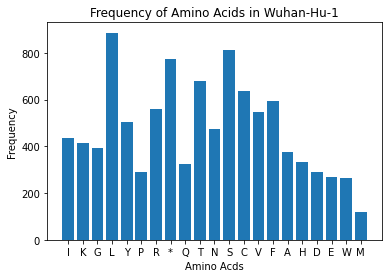

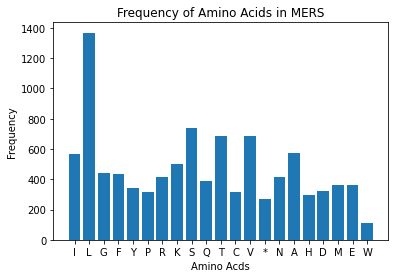

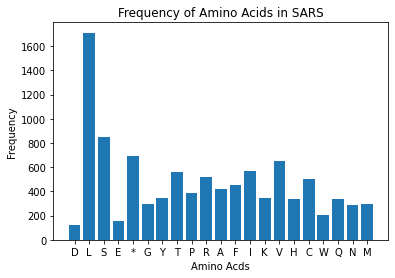

In [ ]:
# plot amino acids for Wuhan-hu-1
plt.bar(covid_freq.keys(), covid_freq.values())
plt.xlabel("Amino Acds")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acids in Wuhan-Hu-1")
plt.show()

# plot of amino acids for SARS
plt.bar(sars_freq.keys(), sars_freq.values())
plt.xlabel("Amino Acds")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acids in MERS")
plt.show()


# plot of amino acids for MERS
plt.bar(mers_freq.keys(), mers_freq.values())
plt.xlabel("Amino Acds")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acids in SARS")
plt.show()


In [ ]:
# For the following scripts i will be using dotplots to compare and contrast the sequence of amino acids amongst the variant
# I was not able to find a library that could support the feature presented here
# Hence I have obtained the sample code and link for the refernce could be found here
# Link :https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

#importing the neccessary library for dotplox function
import numpy as np

#define the delta function
def delta(x,y):
    return 0 if x == y else 1
    
#M[i,j]
def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)

# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

In [ ]:
# Compare wuhan-hu1 and Mers
dotplot(covid_seq[0:10],mers_seq[0:10])

# Compare wuhan-hu1 and sars
dotplot(covid_seq[0:10],sars_seq[0:10]) 

# Compare Mers and sars
dotplot(mers_seq[0:10],sars_seq[0:10]) 

 |GATTTAAGTG
------------
A| ■   ■■   
T|  ■■■   ■ 
T|  ■■■   ■ 
A| ■   ■■   
A| ■   ■■   
A| ■   ■■   
G|■      ■ ■
G|■      ■ ■
T|  ■■■   ■ 
T|  ■■■   ■ 
 |ATATTAGGTT
------------
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
G|      ■■  
T| ■ ■■   ■■
T| ■ ■■   ■■
 |ATATTAGGTT
------------
G|      ■■  
A|■ ■  ■    
T| ■ ■■   ■■
T| ■ ■■   ■■
T| ■ ■■   ■■
A|■ ■  ■    
A|■ ■  ■    
G|      ■■  
T| ■ ■■   ■■
G|      ■■  


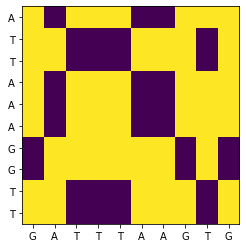

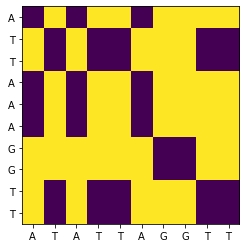

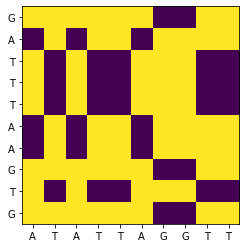

In [ ]:
# Compare wuhan-hu1 and Mers
dotplotx(covid_seq[0:10],mers_seq[0:10])

# Compare wuhan-hu1 and sars
dotplotx(covid_seq[0:10],sars_seq[0:10])

# Compare Mers and sars
dotplotx(mers_seq[0:10],sars_seq[0:10]) 

### 3D Visualization of MERS, SARS and COV-2

Inorder to create an interactive 3D visualization of the codes, I have obtained Resource from RCSB Protein Data Bank:
* Cov-2 : https://www.rcsb.org/3d-view/6LU7
* SARS : https://www.rcsb.org/structure/5XES
* MERS : https://www.rcsb.org/structure/5x5f

In [ ]:
from Bio.PDB import PDBParser,MMCIFParser

parser = PDBParser()
covid_structure = parser.get_structure("6LU7", "6lu7.pdb")
sars_structure = parser.get_structure("5xes", "5xes.pdb")
mers_structure = parser.get_structure("5x5f", "5x5f.pdb")

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  PDBConstructionWarning,


In [ ]:
print("Lenght of COV Structrure:",len(covid_structure))
print("Lenght of SARS Structrure:",len(sars_structure))
print("Lenght of MERS Structrure:",len(mers_structure))

Lenght of COV Structrure: 1
Lenght of SARS Structrure: 20
Lenght of MERS Structrure: 1


In [ ]:
'''
Since I am using Google Collab as a working enviroment
support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. 
Support for these widgets will be loaded from a CDN external from Colab
'''
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import nglview as nv

view_covid =  nv.show_biopython(covid_structure)
view_sars =  nv.show_biopython(sars_structure)
view_mers =  nv.show_biopython(mers_structure)

In [ ]:
#3D view for cov2
view_covid

NGLWidget()

In [ ]:
#3D view for sars
view_sars

NGLWidget()

In [ ]:
#3D view for
view_mers

NGLWidget()

### Alignment Types

Sequence alignment is the process of comparing and detecting similarities between biological sequences. What “similarities” are being detected will depend on the goals of the particular alignment process. Sequence alignment appears to be extremely useful in a number of bioinformatics applications.<br>

For example, the simplest way to compare two sequences of the same length is to calculate the number of matching symbols. The value that measures the degree of sequence similarity is called the alignment score of two sequences.<br>

*  For more info: https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/sequence-alignment#:~:text=Sequence%20alignment%20is%20a%20way,evolutionary%20relationships%20between%20the%20sequences.

Hence we will be pariwise2 from the Bio library and utilize Global Alignment to find the best agreement between all characters in two sequences

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

print("Pairwise Alignment for the First 100 nucleotides btw SARS, MERS and Wuhan-hu1")
print("=================================================================")

# Pairwise alignment for the first 100 nucleotide between sars and Wuhan-hu1
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:100],sars_seq[0:100],one_alignment_only=True,score_only=True)
print("Alignment btw Wuhan-hu1 and SARS  =", cov_n_sars)
# Percentage of similarity between them
covsars_per = cov_n_sars/len(covid_seq[0:100]) * 100
print("Percentage of Similarity btw Wuhan-hu1 and SARS =", covsars_per, "%" )
print("=================================================================")

# Pairwise alignment for the first 100 nucleotide
cov_n_mers = pairwise2.align.globalxx(covid_seq[0:100],mers_seq[0:100],one_alignment_only=True,score_only=True)
print("Alignment btw Wuhan-hu1 and MERS =", cov_n_mers)
# Percentage of similarity between them
covmers_per = cov_n_mers/len(covid_seq[0:100]) * 100
print("Percentage of similarity btw Wuhan-hu1 and MERS =", covmers_per, "%")
print("=================================================================")

# Pairwise alignment for the first 100 nucleotide
sars_n_mers = pairwise2.align.globalxx(sars_seq[0:100],mers_seq[0:100],one_alignment_only=True,score_only=True)
print("Alignment btw SARS and MERS =", cov_n_mers)
# Percentage of similarity between them
covmers_per = cov_n_mers/len(sars_seq[0:100]) * 100
print("Percentage of similarity btw SARS and MERS =", covmers_per, "%")


Pairwise Alignment for the First 100 nucleotides btw SARS, MERS and Wuhan-hu1
Alignment btw Wuhan-hu1 and SARS  = 89.0
Percentage of Similarity btw Wuhan-hu1 and SARS = 89.0 %
Alignment btw Wuhan-hu1 and MERS = 71.0
Percentage of similarity btw Wuhan-hu1 and MERS = 71.0 %
Alignment btw SARS and MERS = 71.0
Percentage of similarity btw SARS and MERS = 71.0 %


In [ ]:
print("Pairwise Alignment for all nucleotides btw SARS, MERS and Wuhan-hu1")
print("=================================================================")

# Pairwise alignment for all nucleotide between sars and Wuhan-hu1
cov_n_sars = pairwise2.align.globalxx(covid_seq[0:],sars_seq[0:],one_alignment_only=True,score_only=True)
print("Alignment btw Wuhan-hu1 and SARS  =", cov_n_sars)
# Percentage of similarity between them
covsars_per = cov_n_sars/len(covid_seq[0:]) * 100
print("Percentage of Similarity btw Wuhan-hu1 and SARS =", covsars_per, "%" )
print("=================================================================")

# Pairwise alignment for all nucleotide
cov_n_mers = pairwise2.align.globalxx(covid_seq[0:],mers_seq[0:],one_alignment_only=True,score_only=True)
print("Alignment btw Wuhan-hu1 and MERS =", cov_n_mers)
# Percentage of similarity between them
covmers_per = cov_n_mers/len(covid_seq[0:]) * 100
print("Percentage of similarity btw Wuhan-hu1 and MERS =", covmers_per, "%")
print("=================================================================")

# Pairwise alignment for all nucleotide
sars_n_mers = pairwise2.align.globalxx(sars_seq[0:],mers_seq[0:],one_alignment_only=True,score_only=True)
print("Alignment btw SARS and MERS =", cov_n_mers)
# Percentage of similarity between them
covmers_per = cov_n_mers/len(sars_seq[0:]) * 100
print("Percentage of similarity btw SARS and MERS =", covmers_per, "%")


Pairwise Alignment for all nucleotides btw SARS, MERS and Wuhan-hu1
Alignment btw Wuhan-hu1 and SARS  = 24794.0
Percentage of Similarity btw Wuhan-hu1 and SARS = 82.91475771661706 %
Alignment btw Wuhan-hu1 and MERS = 20900.0
Percentage of similarity btw Wuhan-hu1 and MERS = 69.89265291107915 %
Alignment btw SARS and MERS = 20900.0
Percentage of similarity btw SARS and MERS = 70.24973950455447 %


As we can observe from the previous assessments __Wuhan-Hu1__ and __SARS__ have 89% similarity in the first 100 nucleotides and 82.9% when compared with the rest, this is as a result of possessing the same genus which belongs to __SARs_Cov__. Additionally, we can also observe that the __MERS__ variant has consistent similarities with both __SARS__ and __Wuhan-Hu1__ on both cases (First 100 nucleotides and All nucleotides).